In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('unfolding/')
from Application_functions import *
from geometry_functions import *
from functions_folding import *

from Unfolding import *

bond_angles = np.radians(np.array([108.,120.]))
bonding_lengths = np.array([1.458,1.401])

In [2]:
unfolding_filename = './unfolding/C60unfolding.npz'
unfolding_filename = './unfolding/thinned-C120Td_C3.npz'
unfolding_number = 0

f = np.load(unfolding_filename,allow_pickle=True)    
arcpos      = f['Arcpos'][unfolding_number]
pentagon_ix = f['Pentagon_ix'][unfolding_number]
path        = f['Paths'][unfolding_number]
isomer      = dict(zip(f['isomer_keys'][:], f['isomer_values'][:]))
root_node   = path[0,0,0]

print(f"Loaded unfoldings for isomer {isomer['name']}.")
dual_neighbours  = isomer['dual_neighbours']
cubic_neighbours = isomer['cubic_neighbours']
hexagons         = isomer['hexagons']
pentagons        = isomer['pentagons']
triangles        = isomer['triangles']

#unfolding_subgraph = arcpos_to_unfolding(dual_neighbours,arcpos)
uf_dg              = unfolding_dual_graph(isomer,arcpos)

uf_cubic,\
    bonds_toBe     = unfolding_bonds(uf_dg, isomer, arcpos)

arc2cubic          = make_arc2cubic(isomer)
faces              = make_faces(dual_neighbours, arc2cubic)
uf_faces           = []

for dual_node,face in enumerate(uf_dg):
    if face != []:
        uf_faces.append(faces[dual_node])
    else:
        uf_faces.append([])

X = isomer['points_opt']

Loaded unfoldings for isomer C120-[GS:1,7,9,23,26,35,41,44,46,50,53,57]-fullerene.


In [3]:
%matplotlib
C60 = Unfolding(uf_dg, uf_faces, faces, uf_cubic, cubic_neighbours, halogen_positions=None, root_node=root_node, bonds_toBe=bonds_toBe, angles_f=None, position_final=X);
#for i in range(1500):
#    C60.optimise_geometry(delta=1e-15)
#plot_graph_3D(C60)

Using matplotlib backend: Qt5Agg
Halogene position : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
length of halogene position: 120
MST = [[], [2, 8, 7, 6, 5, 0], [9], [], [12], [4], [], [16], [], [19], [], [22, 21], [11], [], [], [], [28], [], [], [31], [], [34], [35], [], [], [], [25], [40, 26], [27], [], [43], [45, 30], [], [], [], [49, 48], [], [], [37], [52, 38], [39], [], [], [], [56, 55], [44], [], [], [47], [58], [], [], [51], [], [], [54], [61], [], [], [], [], []], root node: 1
open_hinges = [[0, 1, 2, 3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14], [15, 16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26], [27, 28, 29, 30, 31, 32], [33, 34, 35, 36, 37, 38]]
Pentagon Ids: [ 0  6  8 22 25 34 40 43 45 49 52 56]
Bonds to be: [[  9  14]
 [ 16  36]
 [ 19  39]
 [ 23  45]
 [ 26  30]
 [ 34  38]


/home/avery/work/fullerenes-development/src/ben/unfolding/Unfolding.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hexagons, pentagons = np.array(hexagons), np.array(pentagons)
/home/avery/work/fullerenes-development/src/ben/unfolding/Unfolding.py:289: RuntimeWarning: Mean of empty slice.
  midpoint = self.vertex_coords[self.graph_unfolding_faces[face]].mean(axis=0)
/home/avery/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [4]:
%matplotlib 
C60 = Unfolding(uf_dg, uf_faces, faces, uf_cubic, cubic_neighbours, halogen_positions=None, root_node=0, bonds_toBe=bonds_toBe, angles_f=None, position_final=X);
C60.vertex_coords += np.random.random(C60.vertex_coords.shape)*1e-10

for i in range(10000):
    C60.optimise_geometry(delta=1e-12)


plot_graph_3D(C60)


Using matplotlib backend: Qt5Agg
Halogene position : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
length of halogene position: 120
MST = [[5, 4, 2, 1], [7], [9, 8], [], [12], [6], [16], [], [], [19], [], [22, 21], [11], [], [], [], [28], [], [], [31], [], [34], [35], [], [], [], [25], [40, 26], [27], [], [43], [45, 30], [], [], [], [49, 48], [], [], [37], [52, 38], [39], [], [], [], [56, 55], [44], [], [], [47], [58], [], [], [51], [], [], [54], [61], [], [], [], [], []], root node: 0
open_hinges = [[0, 1, 2, 3], [4, 5, 6, 7, 8], [9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26], [27, 28, 29, 30, 31, 32], [33, 34, 35, 36], [37, 38]]
Pentagon Ids: [ 0  6  8 22 25 34 40 43 45 49 52 56]
Bonds to be: [[  9  14]
 [ 16  36]
 [ 19  39]
 [ 23  45]
 [ 26  30]
 [ 34  38]


E = 126798102909.72098
E = 126809766640.70596
E = 126820125686.47464
E = 126829260394.56226
E = 126837260550.36545
E = 126844224397.23593
E = 126850257331.7461
E = 126855470317.14929
E = 126859978078.0854
E = 126863897155.06998
E = 126867343906.44547
E = 126870432547.23746
E = 126873273308.76395
E = 126875970790.85706
E = 126878622561.89249
E = 126881318042.67317
E = 126884137690.76239
E = 126887152484.00302
E = 126890423687.04814
E = 126894002873.48859
E = 126897932168.72662
E = 126902244674.835
E = 126906965037.65027
E = 126912110117.65414
E = 126917689729.0629
E = 126923707415.46028
E = 126930161234.7658
E = 126937044530.9949
E = 126944346674.88293
E = 126952053759.81822
E = 126960149243.55316
E = 126968614529.71584
E = 126977429486.22412
E = 126986572900.2411
E = 126996022871.33936
E = 127005757146.08002
E = 127015753398.2912
E = 127025989460.02588
E = 127036443508.52129
E = 127047094214.57834
E = 127057920857.64183
E = 127068903412.58142
E = 127080022612.7928
E = 127091259993.7898

E = 112421925513.1263
E = 112407796968.63794
E = 112394282266.74211
E = 112381351013.3132
E = 112368972760.46056
E = 112357116789.68771
E = 112345751882.83264
E = 112334846076.56291
E = 112324366395.99283
E = 112314278562.6824
E = 112304546671.89478
E = 112295132833.51343
E = 112285996770.44653
E = 112277095367.69104
E = 112268382164.4741
E = 112259806781.04831
E = 112251314270.79997
E = 112242844387.3367
E = 112234330755.20445
E = 112225699931.84995
E = 112216870347.48935
E = 112207751108.72226
E = 112198240651.20197
E = 112188225226.58304
E = 112177577209.58319
E = 112166153212.64113
E = 112153791998.75677
E = 112140312188.25925
E = 112125509763.18991
E = 112109155384.66083
E = 112090991555.12373
E = 112070729680.33517
E = 112048047116.56055
E = 112022584328.95685
E = 111993942338.8598
E = 111961680702.33015
E = 111925316340.4985
E = 111884323633.23615
E = 111838136288.27432
E = 111786151601.10239
E = 111727737814.37657
E = 111662245349.63339
E = 111589022690.77484
E = 111507437611.2

E = 108800854168.83627
E = 108809950217.4515
E = 108818915413.97604
E = 108827751191.83337
E = 108836459048.12045
E = 108845040538.58391
E = 108853497272.72818
E = 108861830909.07101
E = 108870043150.54471
E = 108878135740.04893
E = 108886110456.16385
E = 108893969109.01642
E = 108901713536.31145
E = 108909345599.52156
E = 108916867180.23953
E = 108924280176.693
E = 108931586500.4187
E = 108938788073.0959
E = 108945886823.53926
E = 108952884684.84341
E = 108959783591.6824
E = 108966585477.75948
E = 108973292273.40018
E = 108979905903.29071
E = 108986428284.35406
E = 108992861323.76187
E = 108999206917.07542
E = 109005466946.51765
E = 109011643279.36296
E = 109017737766.44867
E = 109023752240.79825
E = 109029688516.35474
E = 109035548386.82068
E = 109041333624.59584
E = 109047045979.81418
E = 109052687179.47089
E = 109058258926.63829
E = 109063762899.76508
E = 109069200752.05478
E = 109074574110.92053
E = 109079884577.51134
E = 109085133726.3048
E = 109090323104.767
E = 109095454233.068

E = 110225114179.83345
E = 110228013302.03384
E = 110230916384.09308
E = 110233823524.17377
E = 110236734821.54784
E = 110239650376.60574
E = 110242570290.86673
E = 110245494666.98471
E = 110248423608.75972
E = 110251357221.14343
E = 110254295610.24939
E = 110257238883.36087
E = 110260187148.93927
E = 110263140516.63092
E = 110266099097.27605
E = 110269063002.91673
E = 110272032346.80386
E = 110275007243.4049
E = 110277987808.41171
E = 110280974158.74704
E = 110283966412.5712
E = 110286964689.28944
E = 110289969109.55904
E = 110292979795.294
E = 110295996869.67226
E = 110299020457.14091
E = 110302050683.42226
E = 110305087675.51869
E = 110308131561.717
E = 110311182471.59373
E = 110314240536.01898
E = 110317305887.15976
E = 110320378658.48447
E = 110323458984.76431
E = 110326547002.07724
E = 110329642847.80862
E = 110332746660.65439
E = 110335858580.62048
E = 110338978749.02368
E = 110342107308.49214
E = 110345244402.96404
E = 110348390177.68585
E = 110351544779.21161
E = 110354708355.

E = 111622744267.4703
E = 111622959304.60358
E = 111623160211.61942
E = 111623347100.71556
E = 111623520082.52048
E = 111623679266.10419
E = 111623824758.9918
E = 111623956667.1749
E = 111624075095.12491
E = 111624180145.80435
E = 111624271920.67975
E = 111624350519.73447
E = 111624416041.4812
E = 111624468582.97348
E = 111624508239.81914
E = 111624535106.19272
E = 111624549274.84721
E = 111624550837.12743
E = 111624539882.98125
E = 111624516500.97377
E = 111624480778.29741
E = 111624432800.78607
E = 111624372652.92572
E = 111624300417.86813
E = 111624216177.44186
E = 111624120012.16432
E = 111624012001.254
E = 111623892222.64258
E = 111623760752.9854
E = 111623617667.67485
E = 111623463040.85089
E = 111623296945.412
E = 111623119453.02759
E = 111622930634.14868
E = 111622730558.0191
E = 111622519292.68622
E = 111622296905.01291
E = 111622063460.68625
E = 111621819024.22998
E = 111621563659.01439
E = 111621297427.26666
E = 111621020390.08041
E = 111620732607.42732
E = 111620434138.1662

E = 110090572802.23694
E = 110088333964.60698
E = 110086301386.7165
E = 110084469728.37543
E = 110082833678.44632
E = 110081387962.45091
E = 110080127349.69966
E = 110079046659.94867
E = 110078140769.57982
E = 110077404617.3057
E = 110076833209.39714
E = 110076421624.44171
E = 110076165017.63092
E = 110076058624.59293
E = 110076097764.77321
E = 110076277844.37767
E = 110076594358.89456
E = 110077042895.20782
E = 110077619133.31892
E = 110078318847.70187
E = 110079137908.3023
E = 110080072281.20874
E = 110081118029.01146
E = 110082271310.8764
E = 110083528382.34845
E = 110084885594.91275
E = 110086339395.3281
E = 110087886324.75912
E = 110089523017.723
E = 110091246200.87251
E = 110093052691.6317
E = 110094939396.70515
E = 110096903310.47437
E = 110098941513.29936
E = 110101051169.73814
E = 110103229526.70192
E = 110105473911.5534
E = 110107781730.16623
E = 110110150464.95139
E = 110112577672.8644
E = 110115060983.3999
E = 110117598096.58551
E = 110120186780.97688
E = 110122824871.66702

E = 110531609881.43912
E = 110530833020.8096
E = 110530054135.66743
E = 110529273266.25072
E = 110528490452.37683
E = 110527705733.44609
E = 110526919148.44559
E = 110526130735.94946
E = 110525340534.12335
E = 110524548580.72614
E = 110523754913.11191
E = 110522959568.2344
E = 110522162582.64737
E = 110521363992.50893
E = 110520563833.58365
E = 110519762141.24403
E = 110518958950.47514
E = 110518154295.87537
E = 110517348211.66113
E = 110516540731.66608
E = 110515731889.34799
E = 110514921717.788
E = 110514110249.6952
E = 110513297517.40802
E = 110512483552.89761
E = 110511668387.77048
E = 110510852053.27051
E = 110510034580.2824
E = 110509215999.33357
E = 110508396340.59702
E = 110507575633.8943
E = 110506753908.698
E = 110505931194.1342
E = 110505107518.98456
E = 110504282911.69025
E = 110503457400.3537
E = 110502631012.74109
E = 110501803776.28546
E = 110500975718.08926
E = 110500146864.92607
E = 110499317243.24506
E = 110498486879.1714
E = 110497655798.51054
E = 110496824026.74992


E = 110220649596.10242
E = 110219993248.18709
E = 110219336939.31628
E = 110218680661.20265
E = 110218024405.486
E = 110217368163.7319
E = 110216711927.43178
E = 110216055688.00111
E = 110215399436.77954
E = 110214743165.02939
E = 110214086863.9354
E = 110213430524.6042
E = 110212774138.06229
E = 110212117695.25696
E = 110211461187.05382
E = 110210804604.23697
E = 110210147937.50783
E = 110209491177.48477
E = 110208834314.70114
E = 110208177339.60571
E = 110207520242.56137
E = 110206863013.8435
E = 110206205643.64001
E = 110205548122.05038
E = 110204890439.08418
E = 110204232584.6603
E = 110203574548.60683
E = 110202916320.65921
E = 110202257890.45895
E = 110201599247.55386
E = 110200940381.39697
E = 110200281281.3443
E = 110199621936.65494
E = 110198962336.48976
E = 110198302469.91072
E = 110197642325.87863
E = 110196981893.2541
E = 110196321160.79494
E = 110195660117.15541
E = 110194998750.88565
E = 110194337050.43018
E = 110193675004.12677
E = 110193012600.20544
E = 110192349826.787

E = 109449130476.92004
E = 109439451573.80554
E = 109429573038.58488
E = 109419489306.31378
E = 109409194636.01312
E = 109398683105.68297
E = 109387948607.32703
E = 109376984842.00873
E = 109365785314.97098
E = 109354343330.85228
E = 109342651989.0378
E = 109330704179.1898
E = 109318492577.00592
E = 109306009640.26488
E = 109293247605.22226
E = 109280198483.4288
E = 109266854059.05563
E = 109253205886.81711
E = 109239245290.59448
E = 109224963362.87918
E = 109210350965.16315
E = 109195398729.42014
E = 109180097060.84314
E = 109164436142.01178
E = 109148405938.6896
E = 109131996207.46967
E = 109115196505.50714
E = 109097996202.60431
E = 109080384495.93533
E = 109062350427.72495
E = 109043882906.22699
E = 109024970730.3649
E = 109005602618.44348
E = 108985767241.3501
E = 108965453260.70764
E = 108944649372.45839
E = 108923344356.39043
E = 108901527132.13443
E = 108879186822.17981
E = 108856312822.47116
E = 108832894881.14642
E = 108808923185.9761
E = 108784388461.04346
E = 108759282073.1

E = 109788269030.67087
E = 109793429527.66895
E = 109798568149.6037
E = 109803685016.98512
E = 109808780249.57089
E = 109813853966.36827
E = 109818906285.63853
E = 109823937324.90015
E = 109828947200.93015
E = 109833936029.76953
E = 109838903926.72487
E = 109843851006.37291
E = 109848777382.56258
E = 109853683168.41882
E = 109858568476.34706
E = 109863433418.0346
E = 109868278104.45648
E = 109873102645.87646
E = 109877907151.85178
E = 109882691731.23732
E = 109887456492.18806
E = 109892201542.16336
E = 109896926987.92966
E = 109901632935.5652
E = 109906319490.46289
E = 109910986757.33453
E = 109915634840.2142
E = 109920263842.46118
E = 109924873866.76543
E = 109929465015.15028
E = 109934037388.97517
E = 109938591088.94128
E = 109943126215.09406
E = 109947642866.8273
E = 109952141142.88742
E = 109956621141.3758
E = 109961082959.75432
E = 109965526694.84766
E = 109969952442.84828
E = 109974360299.3194
E = 109978750359.19897
E = 109983122716.80396
E = 109987477465.83289
E = 109991814699.3

E = 110865353455.65987
E = 110866608726.4962
E = 110867860239.60345
E = 110869108008.87155
E = 110870352048.13947
E = 110871592371.19725
E = 110872828991.78532
E = 110874061923.59605
E = 110875291180.27237
E = 110876516775.40845
E = 110877738722.55081
E = 110878957035.19824
E = 110880171726.801
E = 110881382810.76291
E = 110882590300.44003
E = 110883794209.14139
E = 110884994550.12949
E = 110886191336.62042
E = 110887384581.78409
E = 110888574298.7443
E = 110889760500.57933
E = 110890943200.32166
E = 110892122410.95885
E = 110893298145.43301
E = 110894470416.64177
E = 110895639237.43793
E = 110896804620.63036
E = 110897966578.98323
E = 110899125125.21735
E = 110900280272.00998
E = 110901432031.99411
E = 110902580417.7601
E = 110903725441.85512
E = 110904867116.78394
E = 110906005455.00787
E = 110907140468.94693
E = 110908272170.97836
E = 110909400573.43735
E = 110910525688.61781
E = 110911647528.77167
E = 110912766106.1099
E = 110913881432.80205
E = 110914993520.97702
E = 110916102382.

E = 111180486597.80316
E = 111180996026.85086
E = 111181504962.5409
E = 111182013409.71939
E = 111182521373.22763
E = 111183028857.90031
E = 111183535868.56764
E = 111184042410.05276
E = 111184548487.1749
E = 111185054104.7472
E = 111185559267.57735
E = 111186063980.46867
E = 111186568248.21878
E = 111187072075.61978
E = 111187575467.45973
E = 111188078428.52132
E = 111188580963.58257
E = 111189083077.4166
E = 111189584774.79182
E = 111190086060.47223
E = 111190586939.21695
E = 111191087415.78128
E = 111191587494.91537
E = 111192087181.36581
E = 111192586479.87456
E = 111193085395.17969
E = 111193583932.01501
E = 111194082095.11049
E = 111194579889.19197
E = 111195077318.9818
E = 111195574389.19843
E = 111196071104.5565
E = 111196567469.76756
E = 111197063489.53899
E = 111197559168.57536
E = 111198054511.57791
E = 111198549523.24374
E = 111199044208.26807
E = 111199538571.34175
E = 111200032617.15381
E = 111200526350.3895
E = 111201019775.73163
E = 111201512897.86029
E = 111202005721.4

E = 111405681278.15701
E = 111406476744.44417
E = 111407275129.00797
E = 111408076457.00563
E = 111408880753.86157
E = 111409688045.27046
E = 111410498357.20221
E = 111411311715.9039
E = 111412128147.90579
E = 111412947680.02367
E = 111413770339.36314
E = 111414596153.32443
E = 111415425149.60529
E = 111416257356.2063
E = 111417092801.4347
E = 111417931513.90811
E = 111418773522.55936
E = 111419618856.64175
E = 111420467545.7317
E = 111421319619.73508
E = 111422175108.89104
E = 111423034043.77623
E = 111423896455.31107
E = 111424762374.76245
E = 111425631833.75076
E = 111426504864.2544
E = 111427381498.61322
E = 111428261769.53586
E = 111429145710.10359
E = 111430033353.77673
E = 111430924734.39847
E = 111431819886.20168
E = 111432718843.81424
E = 111433621642.26422
E = 111434528316.98567
E = 111435438903.82523
E = 111436353439.04677
E = 111437271959.33817
E = 111438194501.81715
E = 111439121104.0377
E = 111440051803.99638
E = 111440986640.13736
E = 111441925651.36086
E = 111442868877.

E = 112629518626.01782
E = 112636230939.641
E = 112642880276.35175
E = 112649467382.384
E = 112655992992.97781
E = 112662457832.6623
E = 112668862615.52216
E = 112675208045.44731
E = 112681494816.36794
E = 112687723612.47388
E = 112693895108.42467
E = 112700009969.54417
E = 112706068852.00587
E = 112712072403.0084
E = 112718021260.94176
E = 112723916055.54498
E = 112729757408.05534
E = 112735545931.35164
E = 112741282230.09009
E = 112746966900.83464
E = 112752600532.18262
E = 112758183704.8817
E = 112763716991.94833
E = 112769200958.77682
E = 112774636163.24712
E = 112780023155.82693
E = 112785362479.6741
E = 112790654670.73221
E = 112795900257.82657
E = 112801099762.7555
E = 112806253700.37991
E = 112811362578.7132
E = 112816426899.00452
E = 112821447155.82506
E = 112826423837.14952
E = 112831357424.43816
E = 112836248392.7151
E = 112841097210.64885
E = 112845904340.62816
E = 112850670238.8385
E = 112855395355.33853
E = 112860080134.13283
E = 112864725013.2467
E = 112869330424.7982
E 

E = 113370308375.00269
E = 113370062805.0954
E = 113369812350.89163
E = 113369557029.55234
E = 113369296858.1716
E = 113369031853.77586
E = 113368762033.32681
E = 113368487413.71889
E = 113368208011.78165
E = 113367923844.27974
E = 113367634927.9119
E = 113367341279.31354
E = 113367042915.05539
E = 113366739851.64417
E = 113366432105.52393
E = 113366119693.07495
E = 113365802630.61522
E = 113365480934.39984
E = 113365154620.62244
E = 113364823705.41435
E = 113364488204.84569
E = 113364148134.9255
E = 113363803511.60182
E = 113363454350.76297
E = 113363100668.23593
E = 113362742479.78899
E = 113362379801.12996
E = 113362012647.90805
E = 113361641035.71304
E = 113361264980.0767
E = 113360884496.47173
E = 113360499600.31337
E = 113360110306.95898
E = 113359716631.70813
E = 113359318589.80359
E = 113358916196.4312
E = 113358509466.71985
E = 113358098415.74203
E = 113357683058.51486
E = 113357263409.99924
E = 113356839485.10027
E = 113356411298.66833
E = 113355978865.49829
E = 113355542200.

E = 113004213452.10675
E = 113002899172.99234
E = 113001583694.81253
E = 113000267021.74397
E = 112998949157.94969
E = 112997630107.57874
E = 112996309874.76726
E = 112994988463.63713
E = 112993665878.29771
E = 112992342122.84415
E = 112991017201.35876
E = 112989691117.91066
E = 112988363876.55531
E = 112987035481.33534
E = 112985705936.28049
E = 112984375245.4065
E = 112983043412.71724
E = 112981710442.20294
E = 112980376337.84106
E = 112979041103.59589
E = 112977704743.41927
E = 112976367261.25024
E = 112975028661.01482
E = 112973688946.6264
E = 112972348121.98647
E = 112971006190.98254
E = 112969663157.49069
E = 112968319025.37393
E = 112966973798.48306
E = 112965627480.6565
E = 112964280075.72025
E = 112962931587.48755
E = 112961582019.76033
E = 112960231376.3274
E = 112958879660.96567
E = 112957526877.44025
E = 112956173029.50336
E = 112954818120.8963
E = 112953462155.3472
E = 112952105136.57312
E = 112950747068.27843
E = 112949387954.15652
E = 112948027797.8887
E = 112946666603.1

E = 112419226738.00906
E = 112417663256.11905
E = 112416099542.19339
E = 112414535597.57341
E = 112412971423.5977
E = 112411407021.60107
E = 112409842392.91525
E = 112408277538.86926
E = 112406712460.78804
E = 112405147159.99306
E = 112403581637.80336
E = 112402015895.53436
E = 112400449934.49818
E = 112398883756.00372
E = 112397317361.35693
E = 112395750751.8601
E = 112394183928.81277
E = 112392616893.51068
E = 112391049647.24734
E = 112389482191.31207
E = 112387914526.99182
E = 112386346655.56943
E = 112384778578.32578
E = 112383210296.5379
E = 112381641811.47922
E = 112380073124.42159
E = 112378504236.63182
E = 112376935149.37497
E = 112375365863.9123
E = 112373796381.50267
E = 112372226703.40121
E = 112370656830.86012
E = 112369086765.1287
E = 112367516507.45267
E = 112365946059.07562
E = 112364375421.23708
E = 112362804595.17441
E = 112361233582.12106
E = 112359662383.3084
E = 112358090999.9638
E = 112356519433.31262
E = 112354947684.57639
E = 112353375754.97412
E = 112351803645.7

E = 111772385652.59613
E = 111770808710.5639
E = 111769231872.10123
E = 111767655137.60417
E = 111766078507.46599
E = 111764501982.07898
E = 111762925561.83353
E = 111761349247.11789
E = 111759773038.31938
E = 111758196935.82274
E = 111756620940.0122
E = 111755045051.269
E = 111753469269.97328
E = 111751893596.50334
E = 111750318031.23648
E = 111748742574.54715
E = 111747167226.80858
E = 111745591988.39253
E = 111744016859.66916
E = 111742441841.0065
E = 111740866932.77103
E = 111739292135.32787
E = 111737717449.04016
E = 111736142874.2693
E = 111734568411.37518
E = 111732994060.71622
E = 111731419822.64853
E = 111729845697.52736
E = 111728271685.70564
E = 111726697787.53516
E = 111725124003.36534
E = 111723550333.54474
E = 111721976778.41982
E = 111720403338.33542
E = 111718830013.63516
E = 111717256804.66019
E = 111715683711.75047
E = 111714110735.24469
E = 111712537875.47952
E = 111710965132.78983
E = 111709392507.509
E = 111707819999.96878
E = 111706247610.49957
E = 111704675339.42

E = 111138788528.1436
E = 111137270339.06271
E = 111135752300.29225
E = 111134234411.73624
E = 111132716673.29855
E = 111131199084.88156
E = 111129681646.38788
E = 111128164357.71887
E = 111126647218.77559
E = 111125130229.45798
E = 111123613389.66599
E = 111122096699.29785
E = 111120580158.25214
E = 111119063766.42694
E = 111117547523.7185
E = 111116031430.02338
E = 111114515485.23708
E = 111112999689.25497
E = 111111484041.97067
E = 111109968543.27853
E = 111108453193.07132
E = 111106937991.24156
E = 111105422937.68079
E = 111103908032.28064
E = 111102393274.93127
E = 111100878665.5225
E = 111099364203.94388
E = 111097849890.0841
E = 111096335723.83118
E = 111094821705.07214
E = 111093307833.69423
E = 111091794109.58322
E = 111090280532.62506
E = 111088767102.70468
E = 111087253819.70601
E = 111085740683.5134
E = 111084227694.00967
E = 111082714851.07755
E = 111081202154.59889
E = 111079689604.4551
E = 111078177200.5267
E = 111076664942.6944
E = 111075152830.83731
E = 111073640864.83

E = 110531669782.73264
E = 110530199687.17685
E = 110528729669.79268
E = 110527259730.36838
E = 110525789868.69139
E = 110524320084.54889
E = 110522850377.7291
E = 110521380748.01944
E = 110519911195.20758
E = 110518441719.08112
E = 110516972319.42804
E = 110515502996.03587
E = 110514033748.69212
E = 110512564577.18518
E = 110511095481.3024
E = 110509626460.83136
E = 110508157515.5603
E = 110506688645.27695
E = 110505219849.76927
E = 110503751128.82489
E = 110502282482.23215
E = 110500813909.77892
E = 110499345411.25258
E = 110497876986.44171
E = 110496408635.13454
E = 110494940357.11906
E = 110493472152.18289
E = 110492004020.11464
E = 110490535960.7019
E = 110489067973.73386
E = 110487600058.99797
E = 110486132216.2826
E = 110484664445.37643
E = 110483196746.06784
E = 110481729118.1449
E = 110480261561.39612
E = 110478794075.61008
E = 110477326660.57541
E = 110475859316.08061
E = 110474392041.91417
E = 110472924837.86469
E = 110471457703.72137
E = 110469990639.27235
E = 110468523644.

E = 109940428681.2652
E = 109938973882.389
E = 109937519084.93536
E = 109936064288.7526
E = 109934609493.68951
E = 109933154699.59485
E = 109931699906.3177
E = 109930245113.70734
E = 109928790321.61371
E = 109927335529.88643
E = 109925880738.37561
E = 109924425946.93127
E = 109922971155.40466
E = 109921516363.64548
E = 109920061571.5058
E = 109918606778.83632
E = 109917151985.4888
E = 109915697191.31497
E = 109914242396.16641
E = 109912787599.89572
E = 109911332802.35513
E = 109909878003.39752
E = 109908423202.87564
E = 109906968400.64291
E = 109905513596.55255
E = 109904058790.45818
E = 109902603982.21364
E = 109901149171.67322
E = 109899694358.69135
E = 109898239543.1225
E = 109896784724.82144
E = 109895329903.64362
E = 109893875079.44386
E = 109892420252.07797
E = 109890965421.40211
E = 109889510587.2718
E = 109888055749.54352
E = 109886600908.07397
E = 109885146062.71979
E = 109883691213.33797
E = 109882236359.7859
E = 109880781501.921
E = 109879326639.60104
E = 109877871772.68427


E = 109344102932.25754
E = 109342638886.9492
E = 109341174802.03345
E = 109339710677.46286
E = 109338246513.18951
E = 109336782309.16641
E = 109335318065.34653
E = 109333853781.68353
E = 109332389458.13077
E = 109330925094.64183
E = 109329460691.17111
E = 109327996247.6729
E = 109326531764.10106
E = 109325067240.41112
E = 109323602676.5582
E = 109322138072.49728
E = 109320673428.18417
E = 109319208743.57446
E = 109317744018.62454
E = 109316279253.29016
E = 109314814447.52876
E = 109313349601.29663
E = 109311884714.55087
E = 109310419787.24886
E = 109308954819.3481
E = 109307489810.80698
E = 109306024761.58296
E = 109304559671.63475
E = 109303094540.9209
E = 109301629369.40024
E = 109300164157.03178
E = 109298698903.77495
E = 109297233609.58926
E = 109295768274.43494
E = 109294302898.27173
E = 109292837481.06006
E = 109291372022.76082
E = 109289906523.33463
E = 109288440982.74283
E = 109286975400.94652
E = 109285509777.90762
E = 109284044113.5875
E = 109282578407.9489
E = 109281112660.9

E = 108741747657.2772
E = 108740266207.86505
E = 108738784719.51068
E = 108737303192.2626
E = 108735821626.16908
E = 108734340021.2789
E = 108732858377.64105
E = 108731376695.30469
E = 108729894974.3187
E = 108728413214.73297
E = 108726931416.59695
E = 108725449579.96053
E = 108723967704.87405
E = 108722485791.38766
E = 108721003839.55208
E = 108719521849.41776
E = 108718039821.03604
E = 108716557754.4579
E = 108715075649.73479
E = 108713593506.91827
E = 108712111326.06024
E = 108710629107.2125
E = 108709146850.42728
E = 108707664555.75706
E = 108706182223.25443
E = 108704699852.97244
E = 108703217444.96411
E = 108701734999.28247
E = 108700252515.98105
E = 108698769995.11365
E = 108697287436.73395
E = 108695804840.89612
E = 108694322207.65451
E = 108692839537.06378
E = 108691356829.17809
E = 108689874084.05286
E = 108688391301.7429
E = 108686908482.30371
E = 108685425625.7909
E = 108683942732.26004
E = 108682459801.76721
E = 108680976834.36842
E = 108679493830.11996
E = 108678010789.07

E = 108131869368.46512
E = 108130378231.98505
E = 108128887092.31973
E = 108127395949.59091
E = 108125904803.92023
E = 108124413655.43001
E = 108122922504.24248
E = 108121431350.47937
E = 108119940194.26382
E = 108118449035.71768
E = 108116957874.96411
E = 108115466712.1258
E = 108113975547.32578
E = 108112484380.68759
E = 108110993212.33386
E = 108109502042.38823
E = 108108010870.97446
E = 108106519698.21596
E = 108105028524.2366
E = 108103537349.1607
E = 108102046173.11209
E = 108100554996.21487
E = 108099063818.59348
E = 108097572640.37274
E = 108096081461.67694
E = 108094590282.63094
E = 108093099103.36015
E = 108091607923.98895
E = 108090116744.64291
E = 108088625565.44748
E = 108087134386.52779
E = 108085643208.00957
E = 108084152030.0188
E = 108082660852.68121
E = 108081169676.1228
E = 108079678500.46967
E = 108078187325.84819
E = 108076696152.38474
E = 108075204980.20593
E = 108073713809.43846
E = 108072222640.20918
E = 108070731472.64487
E = 108069240306.87259
E = 108067749143

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [8]:
C60.E

array([[5.78969670e-21, 2.40495094e-19, 1.13478055e-18],
       [1.13478055e-18, 1.03308797e+08, 2.08429081e-19],
       [2.08429081e-19, 0.00000000e+00, 3.70540589e-19],
       [3.70540589e-19, 1.71018733e-18, 7.00553301e-19],
       [7.00553301e-19, 1.03308797e+08, 5.78969670e-21],
       [1.71018733e-18, 7.18808672e+09, 3.75651359e+08],
       [3.75651359e+08, 3.81526821e+08, 3.32786025e+11],
       [3.32786025e+11, 1.28313640e+08, 1.87586173e-18],
       [1.87586173e-18, 8.53874191e+09, 1.03308797e+08],
       [0.00000000e+00, 6.68041927e-21, 0.00000000e+00],
       [0.00000000e+00, 1.17842596e-17, 1.93064117e-18],
       [1.93064117e-18, 5.78969670e-21, 7.18808672e+09],
       [1.03308797e+08, 0.00000000e+00, 1.50309434e-18],
       [1.50309434e-18, 2.41163136e-18, 6.01237734e-20],
       [6.01237734e-20, 1.23520952e-17, 1.12899086e-18],
       [2.40495094e-19, 1.25557859e+10, 1.50309434e-18],
       [1.50309434e-18, 2.67216771e-20, 1.50309434e-18],
       [1.50309434e-18, 2.16445

Halogene position : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
length of halogene position: 60
MST = [[1, 2, 3], [4, 5], [6, 7], [8, 9], [10], [], [11], [], [12], [], [13], [14], [15], [], [], []], root node: 0
open_hinges = [[0, 1, 2], [3, 4, 5, 6, 7, 8], [9, 10, 11], [12, 13, 14]]
Bonds to be: [[35 15]
 [21 22]
 [28 29]
 [51 19]
 [55 26]
 [59 33]
 [34 36]
 [20 40]
 [27 44]
 [37 58]
 [50 41]
 [54 45]
 [57 48]
 [49 52]
 [53 56]]
Halogene parent atom: [19 20 21 26 27 28 33 34 35]
Setting optimal bond length of 15--60 to 1.09
Setting optimal bond length of 19--61 to 1.35
Setting optimal bond length of 20--62 to 1.35
Setting optimal bond length of 21--63 to 1.35
Setting optimal bond length of 22--64 to 1.09
Setting optimal bond length of 26--65 to 1.35
Setting optimal bond length of 27--66 to 1.35
Setting optimal bond length of 28--67 to 1.35
Setting optimal bond length of 29--68 to 1.09
Setting optimal bond l

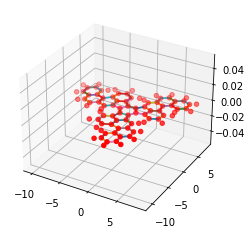

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

In [5]:
#%matplotlib
dual_unfolding, graph_unfolding, graph_unfolding_faces, vertices_final, bonds_toBe, lengths_toBe, angles_f, opt_geom, halogen_positions, neighbours, graph_faces = read_unfolding("./data/unfolding_graph/C60data.h5")
C60 = Unfolding(dual_unfolding, graph_unfolding_faces, graph_faces, graph_unfolding, neighbours, halogen_positions=halogen_positions, root_node=0, bonds_toBe=bonds_toBe, angles_f=angles_f,position_final=None);
C60.optimise_geometry(delta=1e-12)
plot_graph_3D(C60)

In [ ]:
graph_unfolding_faces

In [ ]:
uf_faces

In [ ]:
# dual_unfolding                list of lists;      is unfolding_subgraph
# graph_unfolding_faces         list of lists;      are the faces formed in the unfolding
# graph_faces                   list of lists;      are all the faces of the closed fullerene 
# graph_unfolding               list of lists;      the graph with the cut bonds removed from the neighbour lists
# neighbours                    n by 3 array;       full cubic graph
# halogen_positions             n_perhiphery array; array with the length of the total periphery inidacting the bonded atom type: H = 0; Cl = 1; F = 2
# bonds_toBe                    i by 2 array;       array with the atom indices which will need to form a bond
# angles_f                      n_facec array;      array with the final angles of the faces 

In [ ]:
bonds_toBe          = [[1],[0],[]]
n_removed_bonds     = sum([bonds != [] for bonds in bonds_toBe])
bonds               = np.empty([n_removed_bonds,2])

In [ ]:
Unfolding(unfolding_subgraph, graph_unfolding_faces, graph_faces, graph_unfolding, neighbours, halogen_positions=halogen_positions, root_node=0, bonds_toBe=bonds_toBe, angles_f=angles_f)
